### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

- The independent variable is the condition of Stroop task (congruent and incongruent); 
- The dependent variable is the time it takes to name the ink colors in seconds.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

- The appropriate set of hypotheses for this task:
    - **H<sub>0</sub>**: u<sub>c</sub> - u<sub>i</sub> ≥ 0 (under the incongruent words condition, the mean reaction time is not significantly longer than that of teh congruent words condition);
    - **H<sub>a</sub>**: u<sub>c</sub> - u<sub>i</sub> < 0 (under the incongruent words condition, the mean reaction time is significantly longer than that of the congruent words condition)

where H<sub>0</sub> is the **null hypothesis**, H<sub>a</sub> is **alternative hypothesis**

- I expect to perform **paired t-test**. Because the participants are performed the task under both two conditions.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [164]:
# Perform the analysis here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline

In [165]:
df = pd.read_csv('stroopdata.csv')
df.head() 

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [167]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [168]:
df.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

- For congruent: the mean time of the 24 participants performing the task is 14.051125, the standard deviation is 3.559358, Q1 is 11.895250, Q2 is 11.895250, Q3 is 16.200750, median time is 14.3565;
- For incongruent: the mean time of the 24 participants performing the task is 22.015917, the standard deviation is 4.797057, Q1 is 18.716750, Q2 is 21.017500, Q3 is 24.051500, median time is 21.0175;

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

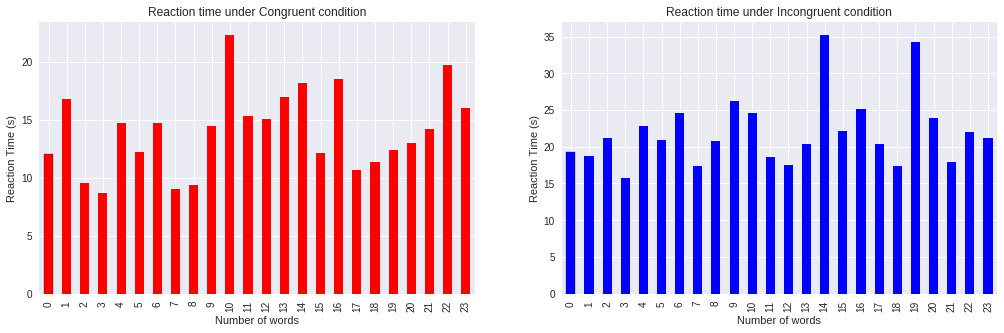

In [169]:
# Build the visualizations here
# Plot both congruent condition and incongruent condtion samples
f = plt.subplots(1,2,figsize=(10,10))
plt.subplot(121)
df['Congruent'].plot(kind='bar',color = 'red',edgecolor = 'black',figsize = (7,5))
plt.xlabel('Number of words')
plt.ylabel('Reaction Time (s)')
plt.title('Reaction time under Congruent condition')

plt.subplot(122)
df['Incongruent'].plot(kind='bar',color = 'blue',edgecolor = 'black',figsize = (7,5))
plt.xlabel('Number of words')
plt.ylabel('Reaction Time (s)')
plt.title('Reaction time under Incongruent condition')
plt.subplots_adjust(left=0.1,right=2.0,wspace=0.2,hspace = 0.7)
plt.show();

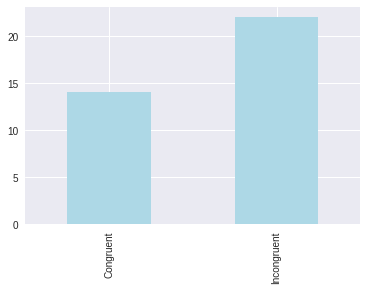

In [170]:
df.mean().plot(kind='bar', color = 'lightblue');

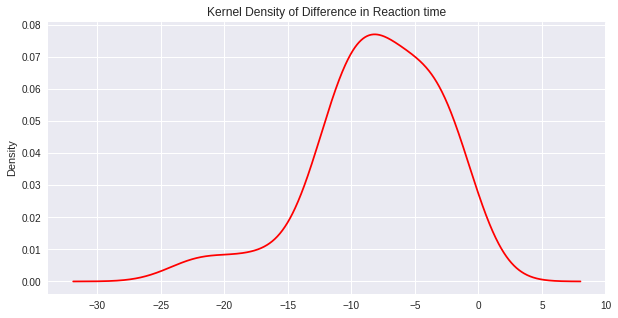

In [171]:
# Plot the Kernel Density of Difference in reaction time of two stroop task condition
(df['Congruent']-df['Incongruent']).plot(kind='kde',color='red',figsize=(10,5))
plt.title("Kernel Density of Difference in Reaction time");

- Based on the Kernel Density Plot shown above, we can visualized the distribution of the difference in reaction time of the task between two different stroop task conditions. According to figure, it is clear that most of the values are negtive, which means that it is likely that the raction time of the task under congruent words condition is shorter than that of the incongruent word conditioin.

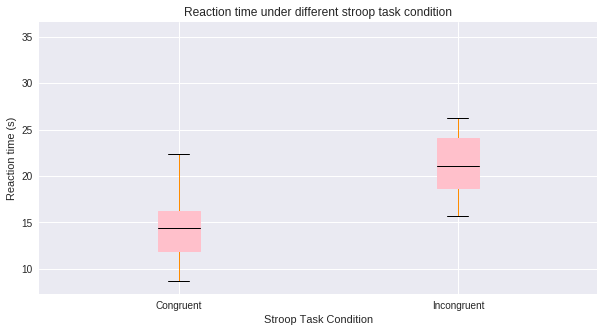

In [172]:
color = dict(boxes='pink', whiskers='DarkOrange',
              medians='black', caps='black')
df.plot(kind='box',color=color, sym = 'b+', patch_artist=True,figsize=(10,5))
plt.xlabel('Stroop Task Condition')
plt.ylabel('Reaction time (s)')
plt.title("Reaction time under different stroop task condition");

- From the ploted figure shown above, we can see that the reaction time of the task under incogruent words condition is longer than that of the congruent words conditioin. 

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [173]:
# Perform the statistical test here

In [174]:
# change the dataframe to list 
Congruent = df['Congruent'].values.tolist()
Incongruent = df['Incongruent'].values.tolist()

In [175]:
# calculate t-statistic value and p-value with scipy
stats.ttest_rel(Congruent,Incongruent)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

In [176]:
# calculate t-critical value with scipy
stats.t.ppf(q=0.05, df=23)

-1.7138715277470478

- The **t-critical value** is **-1.7138715277470478** and the calculated **t-statistic value** is equal to **-8.020706944109957**, which is smaller than t-critical value; the **p-value** is **4.1030005857111781e-08**, which is less than 0.05 and nearly zero, therefore based on both the t-statistic and the p-value of the test, we reject the null hypothesis;

- The participants’ reaction time of the task under the incongruent words condition is significantly longer than that of the congruent words condition.